In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# cargar el ARCHIVO 1 Analisis de vuelos de los clientes fidelizados
# vamos a mostrar las 5 primeras filas del DataFrame

df = pd.read_csv("Customer Flight Activity.csv")
df.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
# cargar el ARCHIVO 2 Historial de fidelización del cliente

df2 = pd.read_csv("Customer Loyalty History.csv")
df2.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


# FASE III: ESTUDIO ESTADISTICO (INFERENCIAL) (BONUS)
### Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
- 1. Preparación de datos:"Loyalty Number" "Flight Booked" "Education"
- 2. Análisis de datos: Agrupar los datos por nivel eduativo y calcula estdisticas descriptivas básicas (promedio,desviacion estandar)del número de vuelos reservados para cada grupo 
- 3. Prueba Estadistica:Realiza una prueba de hipótesis para determian si existe una diferencia significativa enel número d evuelso reservados entre los diferentes niveles educativos 

In [4]:
df2['Education'].value_counts()

Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: Education, dtype: int64

In [22]:
# Comprobar si hay valores nulos en la columna 'Education'
valores_nulos_education = df2['Education'].isnull().sum()
print(f'Número de valores nulos en Education: {valores_nulos_education}')


Número de valores nulos en Education: 0


In [11]:
# Agrupar los datos por Loyalty Number, Year, Month y Distance
clientes_por_estudios = df2.groupby(['Education'])['Loyalty Number'].count().reset_index()


# Mostrar los primeros 24 resultados para verificar
print(clientes_por_estudios.head(24))

              Education  Loyalty Number
0              Bachelor           10475
1               College            4238
2                Doctor             734
3  High School or Below             782
4                Master             508


In [19]:
# voy agrupar en un df para trabajar mejor y calcular el promedio  NUEVO
df2_educ_media = df2.groupby('Education')['Loyalty Number'].mean().reset_index()

print(df2_educ_media)

              Education  Loyalty Number
0              Bachelor   548016.611838
1               College   549120.380132
2                Doctor   570173.113079
3  High School or Below   558165.352941
4                Master   547816.692913


In [14]:
# Agrupar los datos por Loyalty Number, Year, Month y Distance
Vuelos_por_cliente = df.groupby(['Total Flights'])['Loyalty Number'].count().reset_index()


# Mostrar los primeros 24 resultados para verificar
print(Vuelos_por_cliente.head(24))

    Total Flights  Loyalty Number
0               0          197992
1               1            6106
2               2           13032
3               3            9783
4               4           13656
5               5            9309
6               6           15273
7               7            9873
8               8           14056
9               9           10688
10             10           14393
11             11           12300
12             12           12409
13             13           10499
14             14           10310
15             15            8544
16             16            7727
17             17            6198
18             18            5757
19             19            4002
20             20            3417
21             21            2610
22             22            1981
23             23            1616


In [24]:
# Unir los datos originales de los clientes y vuelos usando 'Loyalty Number' como clave
df_merged = pd.merge(df, df2[['Loyalty Number', 'Education']], on='Loyalty Number', how='inner')

# Ahora puedes ver cómo se ven los primeros resultados
print(df_merged.head())


   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100018  2017      2               2                        2   
2          100018  2018     10               6                        4   
3          100018  2017      4               4                        0   
4          100018  2017      5               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1              4      1320               132.0                0   
2             10      3110               311.0              385   
3              4       924                92.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed Education  
0                            0  Bachelor  
1                            0  Bachelor  
2                

In [25]:
# Agrupar por 'Education' y sumar la cantidad de vuelos reservados
vuelos_por_educacion = df_merged.groupby('Education')['Flights Booked'].sum().reset_index()

# Mostrar los resultados
print(vuelos_por_educacion)


              Education  Flights Booked
0              Bachelor         1038123
1               College          426398
2                Doctor           74036
3  High School or Below           78993
4                Master           51614


In [27]:
# Calcular la media y la desviación estándar de la cantidad de vuelos reservados
media_vuelos = vuelos_por_educacion['Flights Booked'].mean()
desviacion_vuelos = vuelos_por_educacion['Flights Booked'].std()

# Mostrar los resultados
print(f"Media de vuelos reservados: {media_vuelos}")
print(f"Desviación estándar de vuelos reservados: {desviacion_vuelos}")


Media de vuelos reservados: 333832.8
Desviación estándar de vuelos reservados: 423284.22900422354


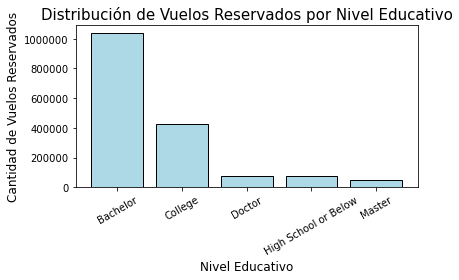

In [32]:
# Datos: Educación y vuelos reservados
educacion = vuelos_por_educacion['Education']
vuelos = vuelos_por_educacion['Flights Booked']

# Crear la gráfica de barras
plt.bar(educacion, vuelos, color='lightblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Cantidad de Vuelos Reservados', fontsize=12)
plt.title('Distribución de Vuelos Reservados por Nivel Educativo', fontsize=15)
plt.xticks(rotation=30)  # Rotar los nombres de los niveles educativos si son largos

# ESTO LO HE BUSACADO NO LO CONOCIA Asegúrate de que el eje Y muestre los valores completos
plt.ticklabel_format(style='plain', axis='y')

# Mostrar la gráfica
plt.tight_layout()  # Para ajustar el espaciado
plt.show()
